In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#loading data (UCI Machine Learning - Online Retail)

path="data/Online_Retail.xlsx"
df=pd.read_excel(path, engine="openpyxl", parse_dates=["InvoiceDate"])
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Data Cleaning 

In [2]:
#delete nan values for customerID
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
df=df[df['CustomerID'].isna()==False]

In [4]:
df.isna().sum()
print(df.shape)

(406829, 8)


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# TotalSum Column
df["Amount"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Creating table RFM (Reference, Frecuency, Value)

In [7]:
#Amount column
customers=df.groupby('CustomerID')["Amount"].sum()
customers=customers.reset_index()
#customers.head()

In [8]:
#InvoiceNo (sum of invoice per client)
customers_freq=df.groupby('CustomerID')['InvoiceNo'].count()
customers_freq=customers_freq.reset_index()
#customers_freq.head()

In [9]:
customers_details=pd.merge(customers_freq,customers, on='CustomerID')
customers_details.head()

,CustomerID,InvoiceNo,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [10]:
#frecuency column, number of days from last invoice date
max_date=max(df['InvoiceDate'])
#max_date

In [11]:
df['Recency']=max_date-df['InvoiceDate']
#df.head()

In [12]:
dates=df.groupby('CustomerID')['Recency'].min()
dates=dates.reset_index()

In [13]:
import datetime as dt
dates['Recency']=dates['Recency'].dt.days
#dates.head()

In [14]:
#FINAL RFM table
customers_details=pd.merge(customers_details,dates, on='CustomerID')
customers_details.head()

,CustomerID,InvoiceNo,Amount,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


In [15]:
#remove outliers
z=customers_details.Amount.quantile(0.05)
y=customers_details.Amount.quantile(0.95)
iqr=y-z

In [16]:
customers_details=customers_details[(customers_details['Amount']>=z-1.5*iqr) &
                                  (customers_details['Amount']<=y+1.5*iqr)]
customers_details

,CustomerID,InvoiceNo,Amount,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


#### Data distribution

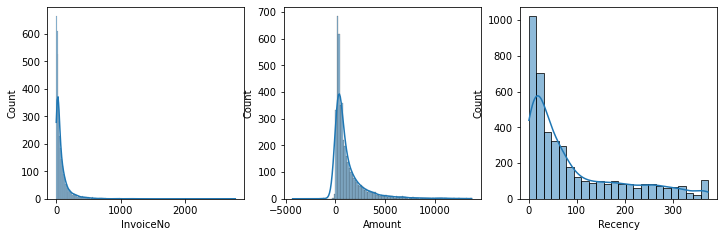

In [17]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(customers_details[["InvoiceNo","Amount","Recency"]], 1):
    plt.subplot(3,3,i)
    sns.histplot(customers_details[column],kde=True)    

In [45]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
# extract features with skew
features=customers_details[["InvoiceNo"]]

#Repeat with log and sqrt
df_features=pd.DataFrame()
df_features["InvoiceNo_log"]=pd.Series(np.log(customers_details["InvoiceNo"])).values
df_features["InvoiceNo_sqrt"]=pd.Series(np.sqrt(customers_details["InvoiceNo"])).values

df_features["Recency_log"]=pd.Series(np.log(customers_details["Recency"])).values
df_features["Recency_sqrt"]=pd.Series(np.sqrt(customers_details["Recency"])).values

C:\Users\Shei\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
# Yeo Johnson transform 
from scipy import stats
df_features["Amount_Yeo"]=stats.yeojohnson(customers_details["Amount"])[0]
df_features["Recency_Yeo"]=stats.yeojohnson(customers_details["Recency"])[0] ## Selected
df_features["Invoice_Yeo"]=stats.yeojohnson(customers_details["InvoiceNo"])[0] ## Selected
df_features["Amount_cbrt"]=pd.Series(np.cbrt(customers_details["Amount"])).values ## Selected

In [47]:
df_features.skew()
#we consider simetric when skew is close to zero, we choose yeo johnson for Recency, Invoice and cbrt for amount

InvoiceNo_log    -0.327201
InvoiceNo_sqrt    1.652264
Recency_log            NaN
Recency_sqrt      0.541034
Amount_Yeo        0.801195
Recency_Yeo      -0.072040
Invoice_Yeo      -0.003798
Amount_cbrt       0.397490
dtype: float64

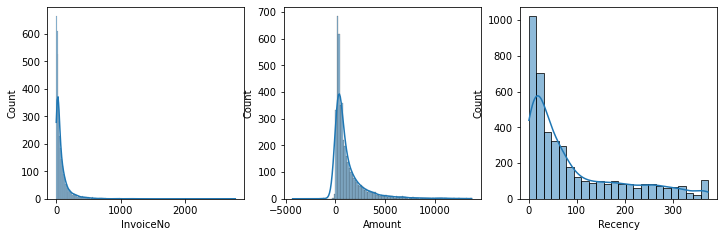

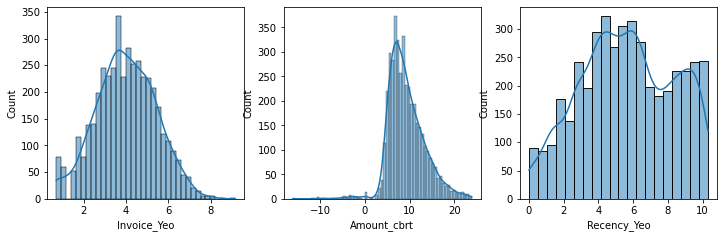

In [52]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(customers_details[["InvoiceNo","Amount","Recency"]].columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(customers_details[column],kde=True) 
#with boxcox
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))    
for i, column in enumerate(df_features[["Invoice_Yeo","Amount_cbrt","Recency_Yeo"]],1):
    plt.subplot(3,3,i)
    sns.histplot(df_features[column],kde=True)

In [53]:
customers_trans=pd.DataFrame()
customers_trans[["Invoice","Amount","Recency"]]=df_features[["Invoice_Yeo","Amount_cbrt","Recency_Yeo"]]
customers_trans

,Invoice,Amount,Recency
0,1.120425,0.000000,9.930745
1,5.724997,16.273929,0.736268
2,3.689093,12.158183,6.410098
3,4.652079,12.068017,3.836185
4,3.044644,6.941001,9.794839
...,...,...,...
4308,2.503445,5.652483,9.504621
4309,2.158514,4.323541,8.413122
4310,2.767278,5.610440,2.501076
4311,7.478908,12.795376,1.566005


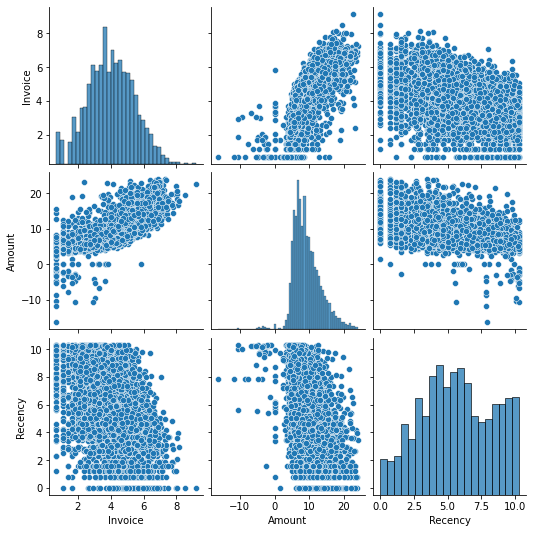

In [54]:
g = sns.pairplot(customers_trans, diag_kind="hist",palette="Set2" )

#### Study of optimal number of clusters

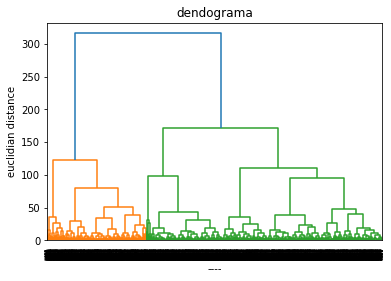

In [56]:
#DENDOGRAM GRAPH
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(customers_trans, method="ward"))

plt.title("dendograma")
plt.xlabel("----")
plt.ylabel("euclidian distance")
plt.show()

#maybe two or three clusters fits

In [57]:
#ELBOW METHOD DEF
from sklearn.metrics import pairwise_distances

def cost(data, k, centroids, clusters):
    cost = 0.0
    for c in range(k):
        points_cluster = data[clusters==c, :]
        if points_cluster.shape[0] > 0: 
            distances = pairwise_distances(points_cluster, [centroids[c]], metric='euclidean')
            cost += np.sum(distances**2)
    return cost/len(clusters)

##### Kmeans testing & Modelling

For n_clusters = 2 The average silhouette_score is : 0.4318772888652621
For n_clusters = 3 The average silhouette_score is : 0.34359095969095294
For n_clusters = 4 The average silhouette_score is : 0.321260449361231
For n_clusters = 5 The average silhouette_score is : 0.3379211375346982


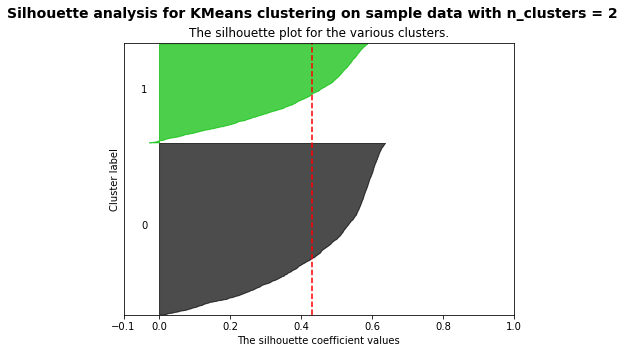

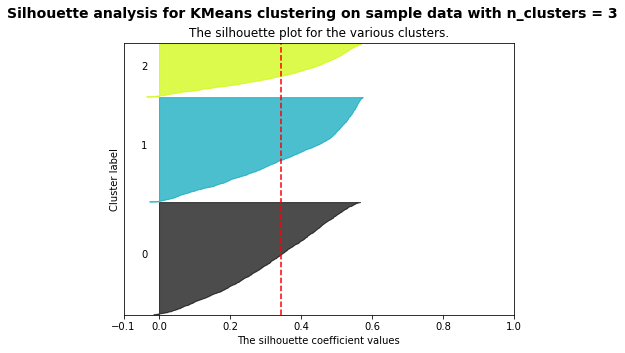

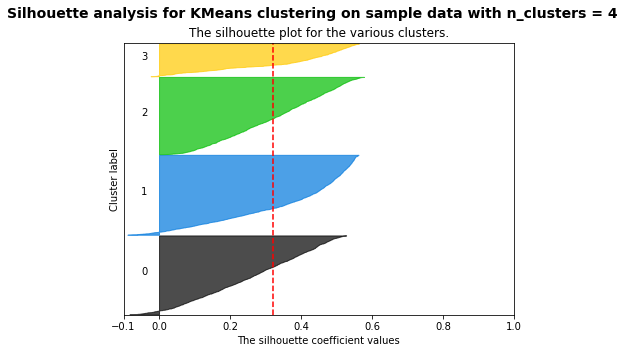

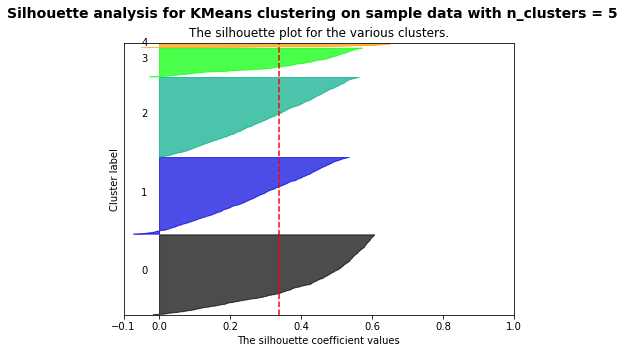

In [58]:
#SILHOUETTE SCORE FOR KMEANS
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_trans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_trans)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_trans, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_trans, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

0,1,2,3,4,5,6,7,8,9,

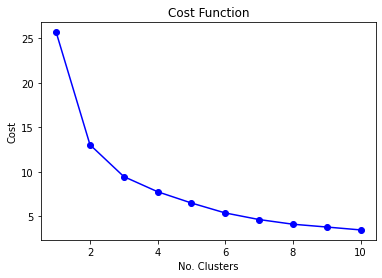

In [60]:
#Elbow method for kmeans
from sklearn.cluster import KMeans

# Array for save the costs
costsD = np.zeros(10,)
# Value of k from 1 to 10
ks = 1+np.arange(10)

for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=5)   
    kmeans.fit(customers_trans.values)
    centroidsD = kmeans.cluster_centers_
    clustersD = kmeans.labels_
    costsD[i] = cost(customers_trans.values,k,centroidsD,clustersD)
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 

In [ ]:
#I decide use 3 cluster based on elbow methond and silhouette

In [61]:
#KMEANS MODEL
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3, max_iter=500, random_state=5)

df_kmeans=customers_trans.copy()
yhat=model.fit_predict(df_kmeans)

df_kmeans["label"]=yhat

print(df_kmeans.groupby("label").size())

label
0    1797
1    1671
2     845
dtype: int64


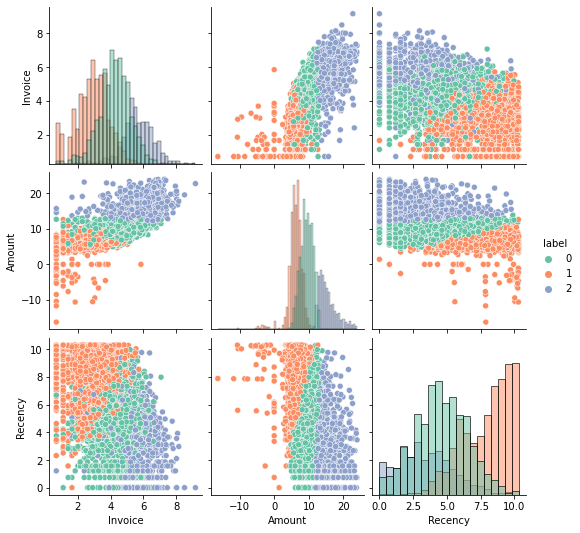

In [62]:
g = sns.pairplot(df_kmeans, hue="label", diag_kind="hist", palette="Set2") 

<Figure size 432x288 with 0 Axes>

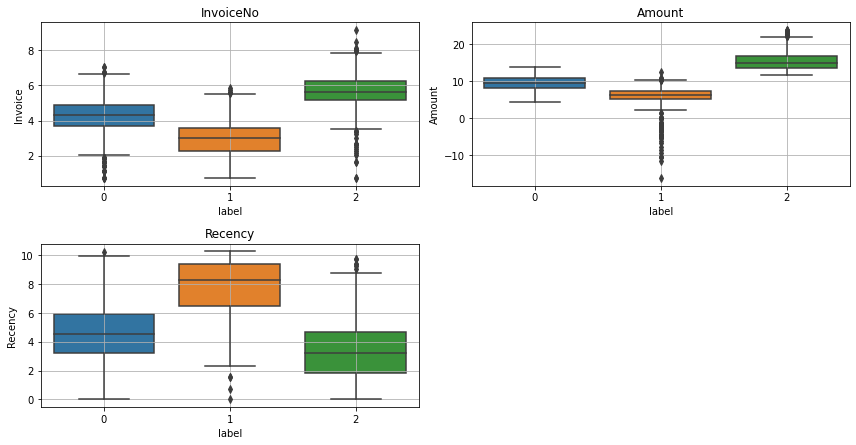

In [64]:
plt.figure(1)
plt.subplots(figsize=(12,12))
plt.subplot(421)
sns.boxplot(x='label',y='Invoice',data=df_kmeans)
plt.title('InvoiceNo')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Amount',data=df_kmeans)
plt.title('Amount')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='Recency',data=df_kmeans)
plt.title('Recency')
plt.grid(True)

plt.tight_layout(rect=(0,0,1,1))
plt.show()

##### Testing MiniBatch Kmeans & Modelling

For n_clusters = 2 The average silhouette_score is : 0.4326552249820956
For n_clusters = 3 The average silhouette_score is : 0.328159107617038
For n_clusters = 4 The average silhouette_score is : 0.32387561480338645
For n_clusters = 5 The average silhouette_score is : 0.32462659732734384


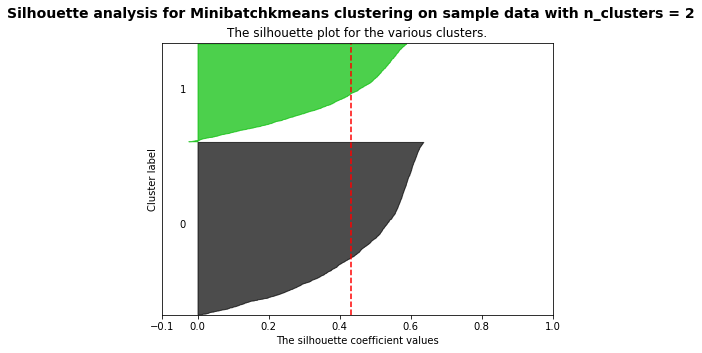

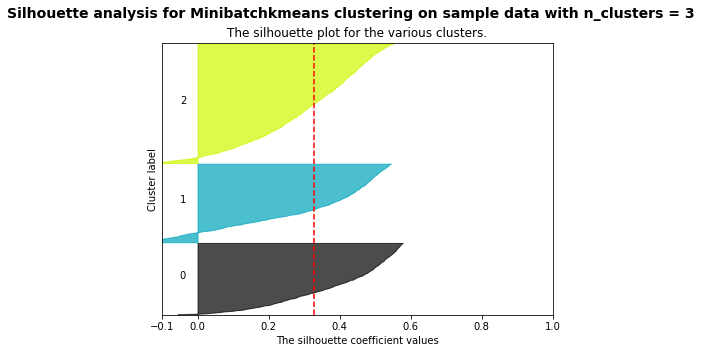

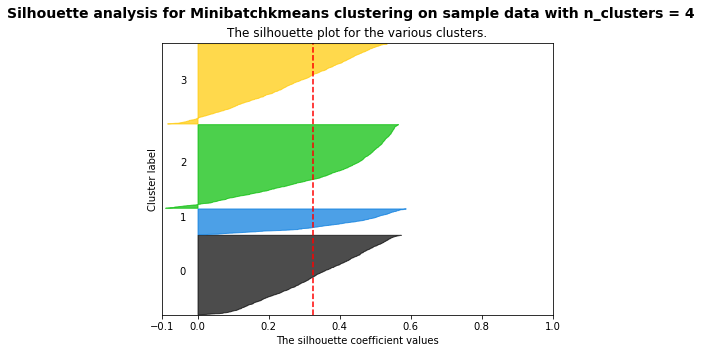

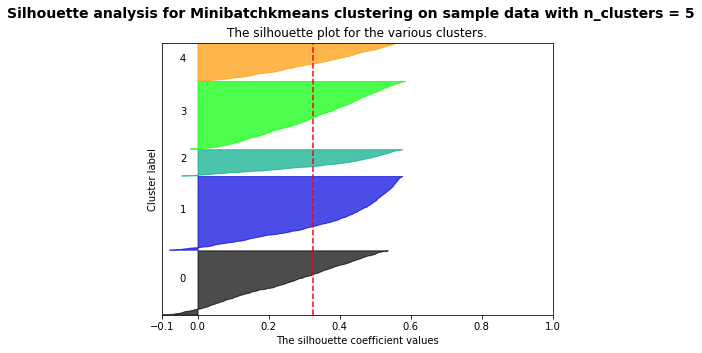

In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MiniBatchKMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_trans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=n_clusters) ### OJO
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_trans) # OJO

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_trans, cluster_labels) #OJO
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_trans, cluster_labels) #OJO

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for Minibatchkmeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

0,1,2,3,4,5,6,7,8,9,

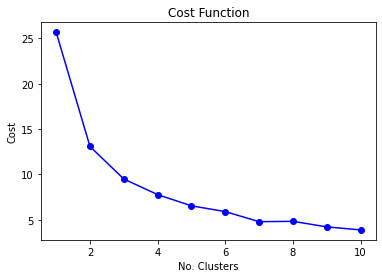

In [68]:
from sklearn.cluster import MiniBatchKMeans

# Array for save the costs
costsD = np.zeros(10,)
# Value of k from 1 a 10
ks = 1+np.arange(10)

for i,k in enumerate(ks):
    mini = MiniBatchKMeans(n_clusters=k, max_iter=500, random_state=5)   
    mini.fit(customers_trans.values)
    centroidsD = mini.cluster_centers_
    clustersD = mini.labels_
    costsD[i] = cost(customers_trans.values,k,centroidsD,clustersD)
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 

In [29]:
#In order to have repeatability and according to the elbow method, I performed the modeling with 3 clusters.

In [70]:
#MiniBatchKMeans MODEL
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=3)
df_mini=customers_trans.copy()

yhat=model.fit_predict(df_mini)

df_mini["label"]=yhat

print(df_mini.groupby("label").size())

label
0     970
1    1905
2    1438
dtype: int64


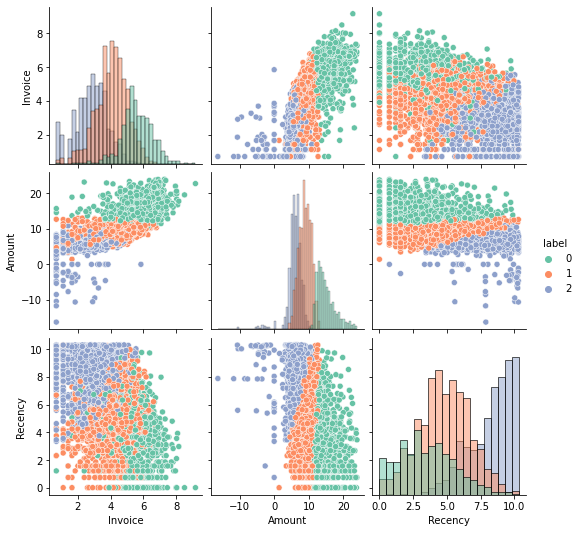

In [71]:
g = sns.pairplot(df_mini, hue="label", diag_kind="hist", palette="Set2") 

<Figure size 432x288 with 0 Axes>

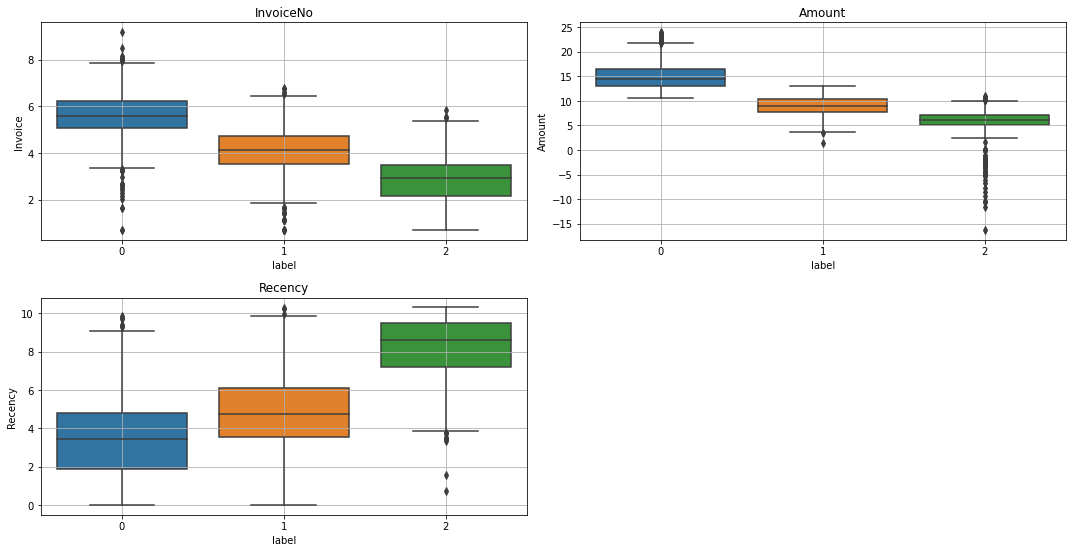

In [72]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Invoice',data=df_mini)
plt.title('InvoiceNo')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Amount',data=df_mini)
plt.title('Amount')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='Recency',data=df_mini)
plt.title('Recency')
plt.grid(True)

plt.tight_layout(rect=(0,0,1,1))
plt.show()

##### Testing & Modelling with Agglomerative clustering 

For n_clusters = 2 The average silhouette_score is : 0.40441904239591225
For n_clusters = 3 The average silhouette_score is : 0.29491254368341874
For n_clusters = 4 The average silhouette_score is : 0.27314043277705946
For n_clusters = 5 The average silhouette_score is : 0.25207418572614537


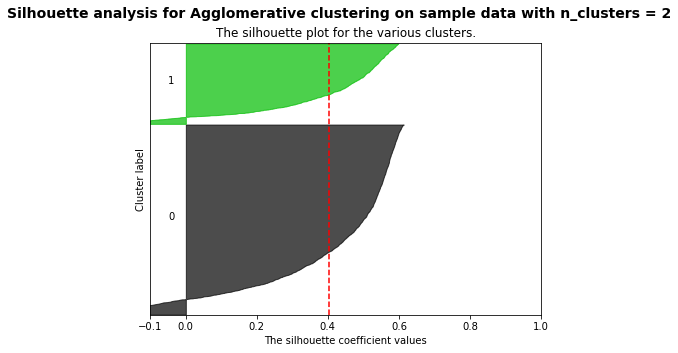

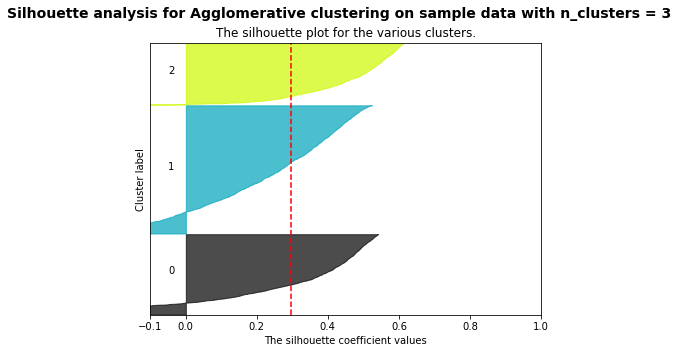

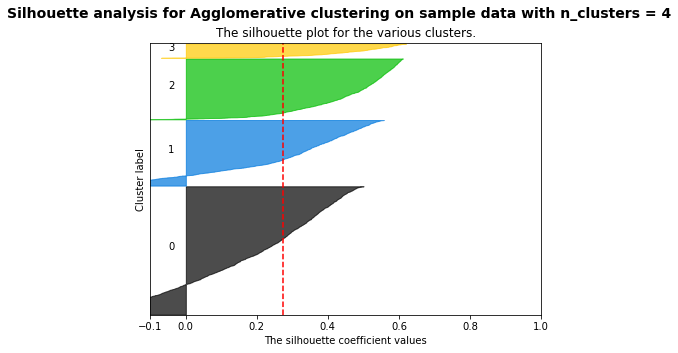

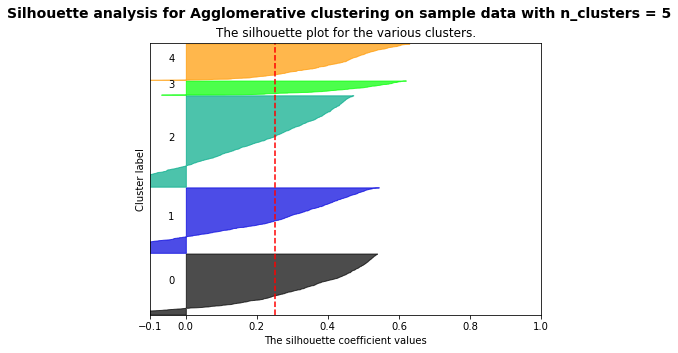

In [73]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_trans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters) ### OJO
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_trans) # OJO

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_trans, cluster_labels) #OJO
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_trans, cluster_labels) #OJO

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [33]:
# In order to have repeatability and according to the silhouette score, we performed the modeling with 3 clusters.

In [75]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

agglomerative= AgglomerativeClustering(n_clusters=3)

df_agglomerative=customers_trans.copy()
yhat=agglomerative.fit_predict(df_agglomerative)

df_agglomerative["label"]=yhat

print(df_agglomerative.groupby("label").size())

label
0    1282
1    2054
2     977
dtype: int64


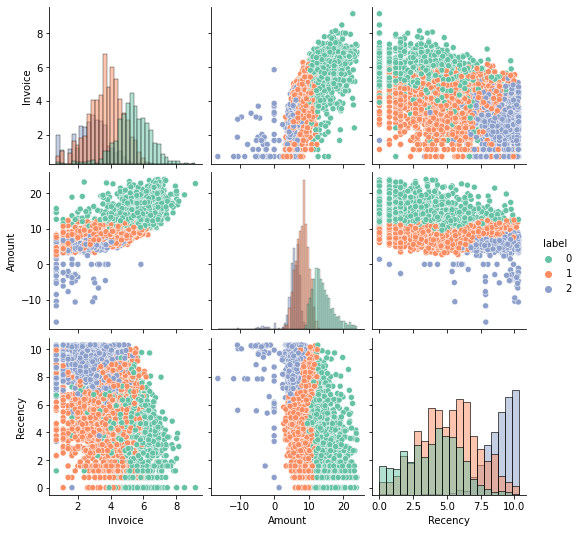

In [76]:
g = sns.pairplot(df_agglomerative, hue="label", diag_kind="hist", palette="Set2") 

<Figure size 432x288 with 0 Axes>

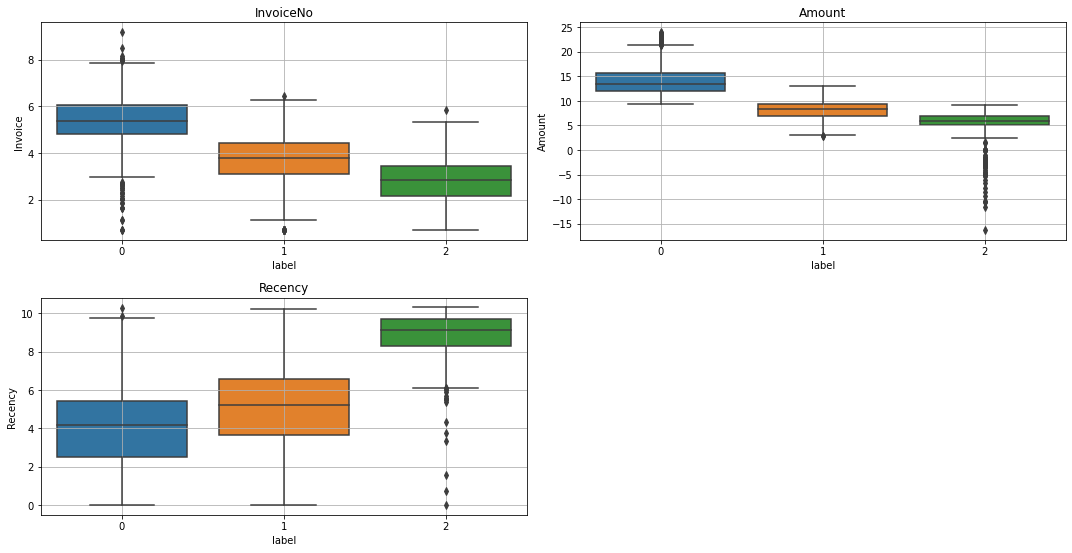

In [77]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Invoice',data=df_agglomerative)
plt.title('InvoiceNo')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Amount',data=df_agglomerative)
plt.title('Amount')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='Recency',data=df_agglomerative)
plt.title('Recency')
plt.grid(True)

plt.tight_layout(rect=(0,0,1,1))
plt.show()

In [78]:
print("kmeans")
print(df_kmeans.groupby("label").size())
print("MiniBatch")
print(df_mini.groupby("label").size())
print("Agglomerative")
print(df_agglomerative.groupby("label").size())

kmeans
label
0    1797
1    1671
2     845
dtype: int64
MiniBatch
label
0     970
1    1905
2    1438
dtype: int64
Agglomerative
label
0    1282
1    2054
2     977
dtype: int64


In [ ]:
#We decided to use kmeans because there seems to be less overlap between classes

In [79]:
customers_details['class']=df_kmeans["label"].values
customers_details

,CustomerID,InvoiceNo,Amount,Recency,class
0,12346.0,2,0.00,325,1
1,12347.0,182,4310.00,1,2
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,1
...,...,...,...,...,...
4367,18280.0,10,180.60,277,1
4368,18281.0,7,80.82,180,1
4369,18282.0,13,176.60,7,0
4370,18283.0,756,2094.88,3,2


- *Class 1* are consumers with few purchases and low amounts, who have not purchased for a longer period of time.
- *Class 2*, the least numerous (845), includes consumers who make many purchases, with a higher amount and more recently.
- *Class 0* are those customers who cannot be included in either category, and who take intermediate values in all parameters.

In [80]:
customers_details.groupby("class").agg({"CustomerID": "count",
                                        "InvoiceNo": ['mean',"max","min"],
                                        "Amount": ['mean',"max","min"],
                                        "Recency": ['mean',"max","min"]})

CustomerID   InvoiceNo                 Amount                     \
           count        mean   max min         mean       max      min   
class                                                                    
0           1797   69.465776   548   1   918.616395   2661.24    89.94   
1           1671   21.347696   202   1   283.583681   2002.40 -4287.63   
2            845  230.117160  2782   1  4091.501788  13677.59  1592.18   

          Recency           
             mean  max min  
class                       
0       43.213689  365   0  
1      178.308797  373   0  
2       25.861538  305   0

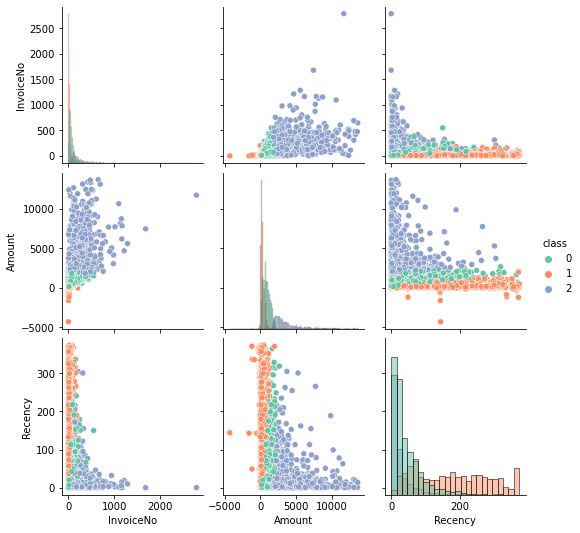

In [81]:
g = sns.pairplot(customers_details[["InvoiceNo","Amount","Recency","class"]], hue="class", diag_kind="hist", palette="Set2") 

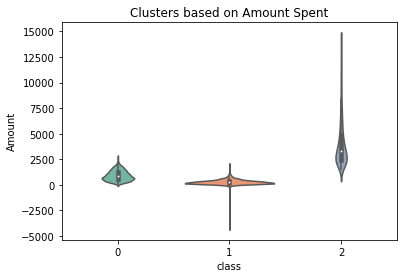

In [82]:
sns.violinplot(x="class",y="Amount",data=customers_details, palette="Set2")
plt.title("Clusters based on Amount Spent")
plt.show()

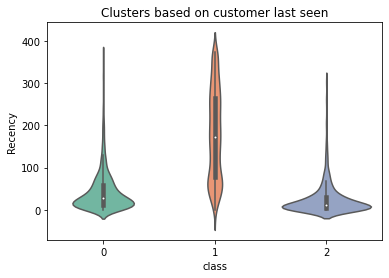

In [83]:
sns.violinplot(x="class",y="Recency",data=customers_details, palette="Set2")
plt.title("Clusters based on customer last seen")
plt.show()

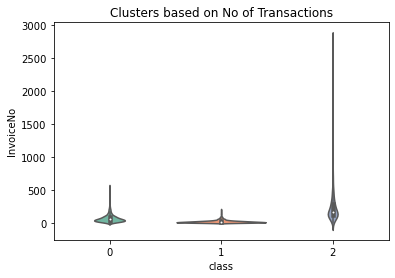

In [84]:
sns.violinplot(x="class",y="InvoiceNo",data=customers_details, palette="Set2")
plt.title("Clusters based on No of Transactions")
plt.show()